In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

from numpy import median, mean
import statistics
%matplotlib inline


In [3]:
path = '/Users/ishan/desktop/niroggyan/get_active_data_analysis/data/'
data = pd.read_csv(path + 'final.csv')

In [4]:
new = pd.pivot_table(data, values='VALUE', index=['NAME', 'AGE', 'GENDER'],
                    columns=['PARAM TEST'], aggfunc=np.sum, fill_value=0)

bp = new[['BODY MASS INDEX','HEIGHT','WEIGHT', 'Diastolic', 'Systolic']]


In [5]:
bp['Systolic'].unique()

array(['120', '111', '146', '127', '128', '100', '144', '135', '137137',
       '136', '113', '131', '124', '133', 0, '167', '166', '102', '152',
       '117117', '138', '165', '126', '118', '100100', '83', '104104',
       '150', '116', '107', '204', '123', '121', '134', '139139', '97',
       '142', '148', '129', '130', '139', '101', '137', '101101', '108',
       '141', '115', '185', '143', '96', '130130', '122', '173173', '132',
       '125', '145', '114', '118118', '155', '104', '116116', '153',
       '131131', '119', '105', '110', '95', '114114', '138138', '111111',
       '107107', '62.2', '99', '122122', '149', '140', '103103', '126126',
       '136136', '117', '129129129', '110110', '135135', '147', '102102',
       '151', '142142', '161161', '153153', '103', '125125', '109',
       '113113', '105105', '159', '106106', '98', '161', '112', '149149',
       '93', '116116116', '108108', '160', '169169', '127127', '106',
       '112112', '163', '123123', '128128', '124124', '1291

In [4]:
#Adding gender
l = []
for i in bp.index:
    l.append(i[2])


bp['Gender'] = l


#Adding age
a = []
for i in bp.index:
    a.append(int(i[1]))
bp['Age'] = a

bp = bp[['Age', 'Gender','BODY MASS INDEX' ,'HEIGHT', 'WEIGHT', 'Diastolic', 'Systolic']]
bp.columns = ['Age', 'Gender', 'Bmi', 'Height', 'Weight', 'Diastolic', 'Systolic']



bp.head(20)

,,,Age,Gender,Bmi,Height,Weight,Diastolic,Systolic
NAME,AGE,GENDER,,,,,,,
A Anisha,28,female,28,female,31.47,155,75.6,86,120
A Bhanu,31,male,31,male,25.58,168,72.2,80,111
A ROMIO SINGH,30,male,30,male,25.48,163,67.7,100,146
ABHISHEK KASHYAP,36,male,36,male,29,171,84.8,92,127
AJAY BENJWAL,28,male,28,male,24.25,171,70.9,75,128
AKHIL GARG,32,male,32,male,22.57,170.5,65.6,89,128
ALEENA GEORGE,24,female,24,female,22.02,145,46.3,77,100
ANKIT AGRAWAL,23,male,23,male,26.13,173,78.2,89,144
ANKUSH MISHRA,25,male,25,male,27.74,174,84,93,135


<h3>Changing Datatypes</h3>

In [5]:
def convert(s):
    s = str(s)
    try:
        i = s.index('.')
        return float(s[:(i+2)])
    except:
        return float(s)
    
    

In [6]:
bp['Bmi'] = bp['Bmi'].map(lambda s: convert(s))
bp['Weight'] = bp['Weight'].map(lambda s: convert(s))
bp['Height'] = bp['Height'].map(lambda s: convert(s))

bp = bp[bp.Diastolic!='Not Required']
bp['Diastolic'] = bp['Diastolic'].map(lambda s: convert(s))
bp['Systolic'] = bp['Systolic'].map(lambda s: convert(s))

bp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2533 entries, ('A Anisha', 28, 'female') to ('zmohammed', 30, 'female')
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        2533 non-null   int64  
 1   Gender     2533 non-null   object 
 2   Bmi        2533 non-null   float64
 3   Height     2533 non-null   float64
 4   Weight     2533 non-null   float64
 5   Diastolic  2533 non-null   float64
 6   Systolic   2533 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 168.7+ KB


<h3> Analysis </h3>

In [7]:
bp.shape

(2533, 7)

In [8]:
bp.isnull().any()

Age          False
Gender       False
Bmi          False
Height       False
Weight       False
Diastolic    False
Systolic     False
dtype: bool

In [9]:
#removing outliers
bp = bp[bp.Age<100]
bp = bp[bp.Diastolic<200]
bp = bp[bp.Systolic<200]
bp = bp[(bp.Weight<140) &(bp.Weight>10)]
bp = bp[(bp.Height<200) & (bp.Height>2)]


<h4>Diastolic</h4>

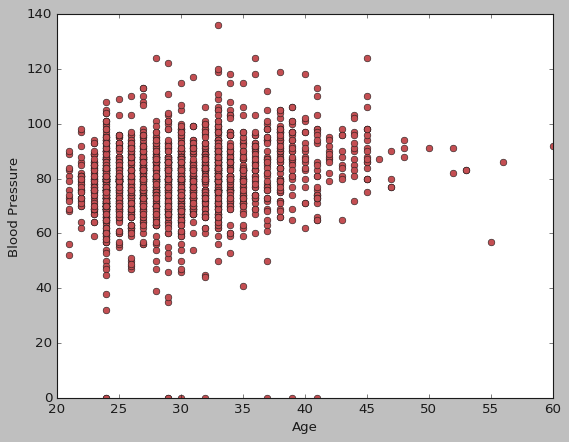

In [10]:
xAge = bp['Age'] # our only feature
yRestingBloodPressure = bp['Diastolic'] # blood pressure

sns.set()
plt.style.use('classic')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.plot(xAge,yRestingBloodPressure,'ro')

<h4>Systolic</h4>

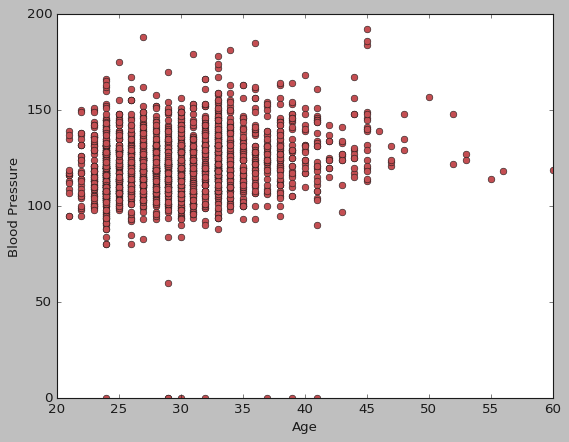

In [11]:
xAge = bp['Age'] # our only feature
yRestingBloodPressure = bp['Systolic'] # blood pressure

sns.set()
plt.style.use('classic')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.plot(xAge,yRestingBloodPressure,'ro')

<h4>SImple linear Regression</h4>

Text(0, 0.5, 'Blood pressure')

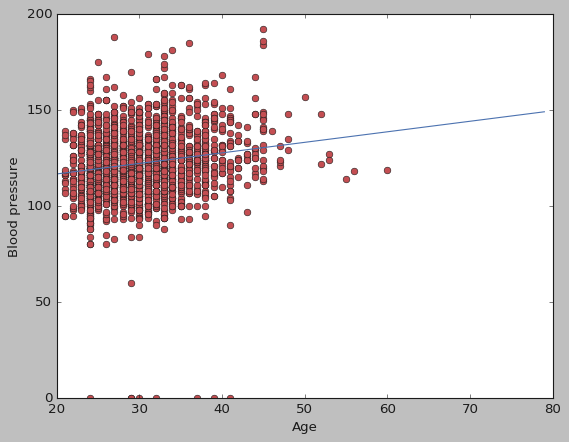

In [12]:
from sklearn.linear_model import LinearRegression 
linearRegression = LinearRegression()

x = np.array(list(map(lambda i : [1, i], xAge))) # adding x0, which is 1
linearRegression.fit(x, yRestingBloodPressure)

xPlot = range(20,80)
yPlot = linearRegression.predict(np.array(list(map(lambda i : [1, i], xPlot))))

line = plt.plot(xAge,yRestingBloodPressure,'ro')
plt.setp(line, linewidth = 3.0)
plt.plot(xPlot,yPlot)
plt.xlabel('Age')
plt.ylabel('Blood pressure')


<h4> Simple Polynomial Regression</h4>

Text(0, 0.5, 'Blood pressure')

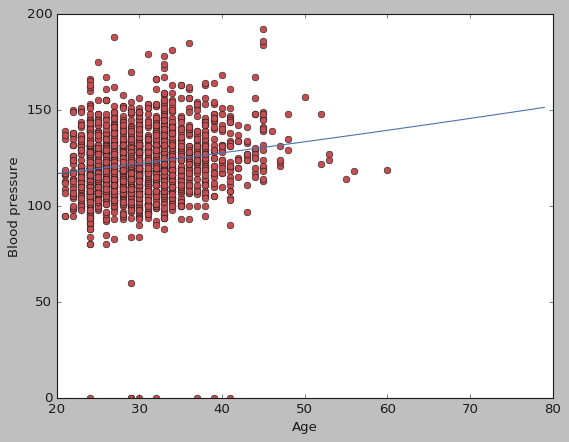

In [13]:
linearRegressionPoly = LinearRegression(normalize=True) # Feature scaling on

xPoly = np.array(list(map(lambda i : [1, i, i**2], xAge)))
linearRegressionPoly.fit(xPoly, yRestingBloodPressure)

xPlot = range(20,80)
yPlot = linearRegressionPoly.predict(np.array(list(map(lambda i : [1, i, i**2], xPlot))))

line = plt.plot(xAge,yRestingBloodPressure,'ro')
plt.setp(line, linewidth = 3.0)
plt.plot(xPlot,yPlot)
plt.xlabel('Age')
plt.ylabel('Blood pressure')


In [14]:
#Blood Pressure ranges


In [15]:
#Giving status according to BMI
'''
low = (bp.Diastolic<60)&(bp.Systolic<90)
ideal = (bp.Diastolic<80)&(bp.Systolic<120)
prehigh = (bp.Diastolic<90)&(bp.Systolic<140)
high = (bp.Diastolic<100)&(bp.Systolic<190)
'''
def convert_status_to_description(x):
    if (x.Diastolic<60)&(x.Systolic<90):
        return 'low'
    elif (x.Diastolic<80)&(x.Systolic<120):
        return 'ideal'
    elif (x.Diastolic<90)&(x.Systolic<140):
        return 'pre-high'
    else:
        return 'High'
    
bp['BPStatus'] = bp.apply(convert_status_to_description,axis=1)
bp.head(20)


,,,Age,Gender,Bmi,Height,Weight,Diastolic,Systolic,BPStatus
NAME,AGE,GENDER,,,,,,,,
A Anisha,28,female,28,female,31.4,155.0,75.6,86.0,120.0,pre-high
A Bhanu,31,male,31,male,25.5,168.0,72.2,80.0,111.0,pre-high
A ROMIO SINGH,30,male,30,male,25.4,163.0,67.7,100.0,146.0,High
ABHISHEK KASHYAP,36,male,36,male,29.0,171.0,84.8,92.0,127.0,High
AJAY BENJWAL,28,male,28,male,24.2,171.0,70.9,75.0,128.0,pre-high
AKHIL GARG,32,male,32,male,22.5,170.5,65.6,89.0,128.0,pre-high
ALEENA GEORGE,24,female,24,female,22.0,145.0,46.3,77.0,100.0,ideal
ANKIT AGRAWAL,23,male,23,male,26.1,173.0,78.2,89.0,144.0,High
ANKUSH MISHRA,25,male,25,male,27.7,174.0,84.0,93.0,135.0,High


In [16]:
bpmales= bp[bp.Gender=='male']
bpfemales = bp[bp.Gender=='female']

In [17]:
bp.BPStatus.value_counts()

pre-high    897
ideal       706
High        510
low          18
Name: BPStatus, dtype: int64

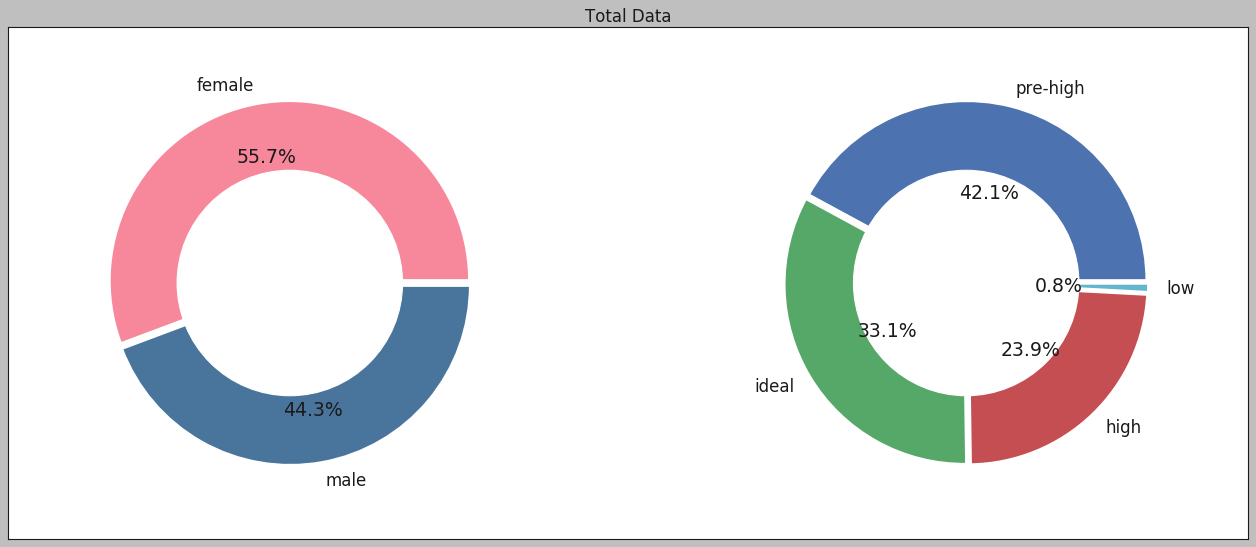

In [18]:
people = bp['Gender'].value_counts() 
categories = bp['BPStatus'].value_counts() 

fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot

ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['pre-high','ideal','high','low'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes



In [19]:
print('total\t',len(bp))
print(bp.BPStatus.value_counts())

total	 2131
pre-high    897
ideal       706
High        510
low          18
Name: BPStatus, dtype: int64


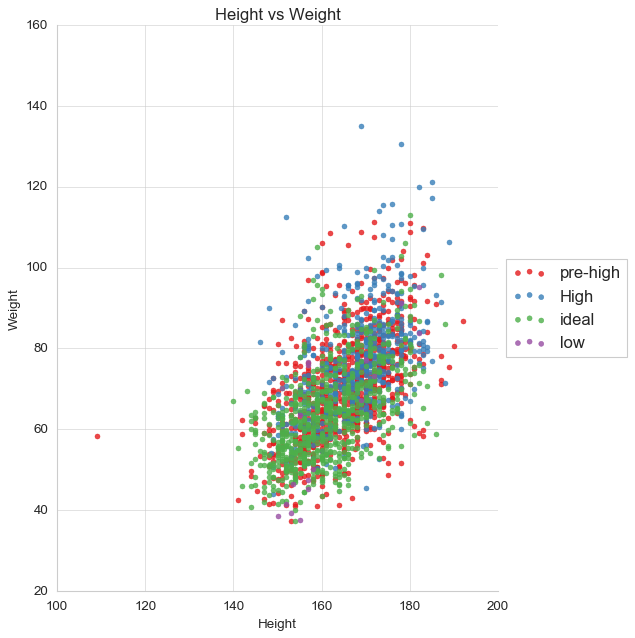

In [20]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=bp, 
           fit_reg=False, 
           hue='BPStatus',
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})



<h4>Only Males</h4>

In [21]:
print('total\t', len(bpmales))
print(bpmales.BPStatus.value_counts())

total	 1187
pre-high    564
High        385
ideal       233
low           5
Name: BPStatus, dtype: int64


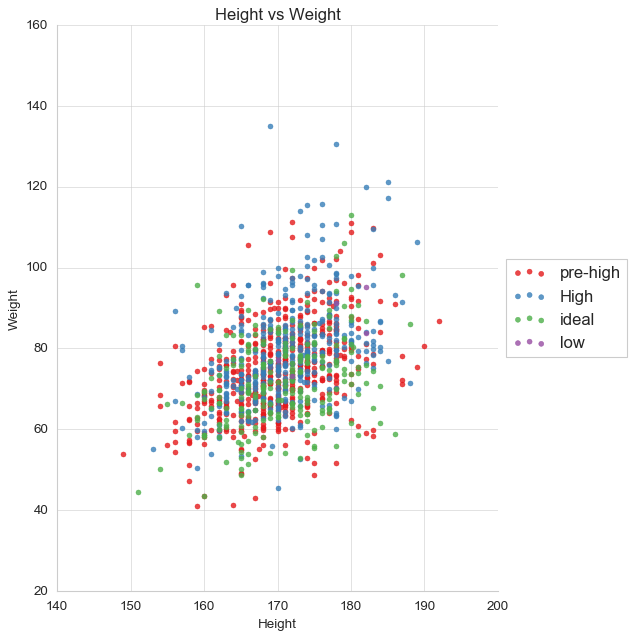

In [22]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=bpmales, 
           fit_reg=False, 
           hue='BPStatus',
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

#TODO: check outliers!!! ->Lipid profiles!

<h4>Only Females</h4>

In [23]:
print('total\t', len(bpfemales))
print(bpfemales.BPStatus.value_counts())

total	 944
ideal       473
pre-high    333
High        125
low          13
Name: BPStatus, dtype: int64


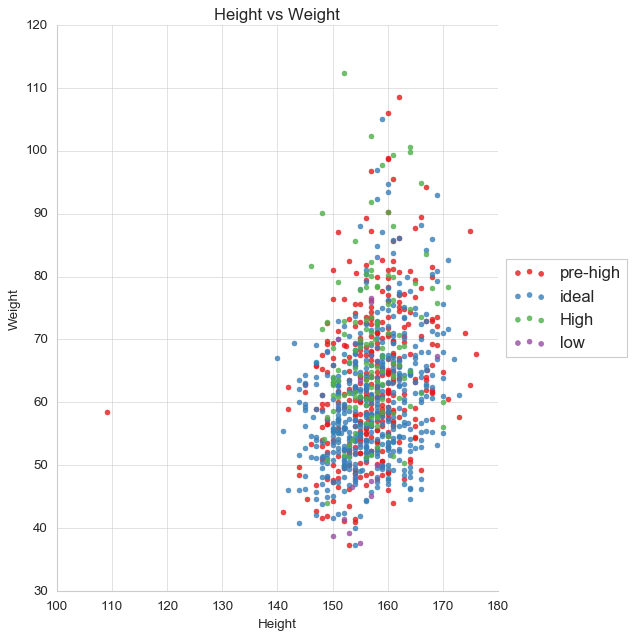

In [24]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=bpfemales, 
           fit_reg=False, 
           hue='BPStatus',
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

#TODO: check outliers!!! ->Lipid profiles!

<h3>Diastolic v/s Systolic</h3>

<Figure size 1600x800 with 0 Axes>

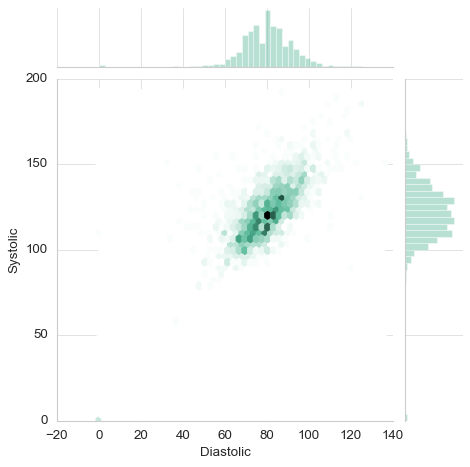

In [25]:
plt.figure(figsize=(20,10))
sns.jointplot(bp.Diastolic, bp.Systolic, kind="hex", color="#4CB391")

In [26]:
print('Paramter: Diastolic, Systolic')
print('Median: ', bp.Diastolic.median(), bp.Systolic.median())
print('Mean: ', bp.Diastolic.mean(), bp.Systolic.mean())
print('Medain low: ', statistics.median_low(bp.Diastolic), statistics.median_low(bp.Systolic))
print('Median high: ', statistics.median_high(bp.Diastolic), statistics.median_high(bp.Systolic))
print('Median Grouped: ', statistics.median_grouped(bp.Diastolic),statistics.median_grouped(bp.Systolic))
print('Mode: ', statistics.mode(bp.Diastolic), statistics.mode(bp.Systolic))

print('\n')

print('Males Median: ', bpmales.Diastolic.median(), bpmales.Systolic.median())
print('Males Mean:) ',bpmales.Diastolic.mean(),bpmales.Systolic.mean())


print('\n')

print('Females Median: ', bpfemales.Diastolic.median(), bpfemales.Systolic.median())
print('Females Mean: ',bpfemales.Diastolic.mean(), bpfemales.Systolic.median())


Paramter: Diastolic, Systolic
Median:  80.0 121.0
Mean:  79.90051618958236 122.12566870014078
Medain low:  80.0 121.0
Median high:  80.0 121.0
Median Grouped:  80.05940594059406 121.3157894736842
Mode:  80.0 120.0


Males Median:  83.0 127.0
Males Mean:)  82.77927548441448 127.56023588879528


Females Median:  76.0 114.0
Females Mean:  76.28072033898304 114.0


In [27]:
#hue
#Scatter-size
#bmi v/s cholestrol
#bp v/s cholestrol


In [28]:
#correlations
print('Systolic v/s Diastolic: ', bp.Systolic.corr(bp.Diastolic))
print('Systolic v/s Bmi: ',bp.Systolic.corr(bp.Bmi))
print('Bmi v/s Diastolic: ',bp.Diastolic.corr(bp.Bmi))


Systolic v/s Diastolic:  0.7198457507359157
Systolic v/s Bmi:  0.22957582804051285
Bmi v/s Diastolic:  0.20236555012075502


In [29]:
list(new.columns)


['A/G RATIO',
 'ALANINE AMINOTRANSFERASE (ALT/SGPT)',
 'ALBUMIN',
 'ALKALINE PHOSPHATASE',
 'ASPARTATE AMINOTRANSFERASE (AST/SGOT)',
 'BACTERIA',
 'BASOPHILS',
 'BASOPHILS %',
 'BILIRUBIN (INDIRECT)',
 'BILIRUBIN CONJUGATED (DIRECT)',
 'BILIRUBIN, TOTAL',
 'BLOOD',
 'BLOOD UREA NITROGEN',
 'BODY MASS INDEX',
 'CALCIUM',
 'CASTS',
 'CHOL / HDL RATIO',
 'COLOUR',
 'CREATININE',
 'CRYSTALS',
 'Diastolic',
 'EOSINOPHILS',
 'EOSINOPHILS %',
 'EPITHELIAL CELLS',
 'ESR (ERYTHROCYTE SEDIMENTATION RATE)',
 'ESTIMATED AVERAGE GLUCOSE (eAG)',
 'Electrocardiogram (ECG)',
 'GAMMA GLUTAMYL TRANSPEPTIDASE (GGT)',
 'GLOBULIN',
 'GLUCOSE',
 'GLUCOSE, FASTING',
 'HAEMOGLOBIN',
 'HDL CHOLESTEROL',
 'HEIGHT',
 'HS-CRP (HIGH SENSITIVITY C-REACTIVE PROTEIN)',
 'HbA1c, GLYCATED HEMOGLOBIN',
 'KETONES',
 'LDL CHOLESTEROL',
 'LYMPHOCYTES',
 'LYMPHOCYTES %',
 'MCH',
 'MCHC',
 'MCV',
 'MONOCYTES',
 'MONOCYTES %',
 'NEUTROPHILS',
 'NEUTROPHILS %',
 'NITRITE',
 'OTHERS',
 'PCV',
 'PERIPHERAL SMEAR',
 'PHOSPHORUS, 

In [30]:
bp['Systolic'].corr(bp['Diastolic'])

0.7198457507359157

In [31]:
bp['Weight'].corr(bp['Bmi'])

0.8028554297180827

In [33]:
abs(bp['Height'].corr(bp['Bmi']))

0.015929619671388586

In [35]:
abs(bp['Bmi'].corr(bp['Height']))

0.015929619671388586